In [41]:
import os
import math
import numpy as np
import pandas as pd
import pickle
import random

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import pi
from matplotlib import cm


In [20]:
# em3 = 0.846, em5=1.163, em8=1.423
Em = 1.163
m_output = 5

def g_sin1d(x):
    z = 2 * np.sin(6 * np.pi * x) - 3 * x
    noise = np.random.normal(loc=0, scale=(0.2 + x * 3), size=x.shape[0])
    sx = 0.2 + x * 3
    Gx = z + Em * sx
    #     y_ob = zxp + np.random.normal(loc=0, scale=(0.5+xp*2), size=(1000, 1000))
    return z + noise, Gx[0]


def ackley(x):
    n = 2
    a = 20;
    b = 0.2;
    c = 2 * np.pi
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 0
    for i in range(0, n):
        s1 = s1 + x[i] ** 2
        s2 = s2 + math.cos(c * x[i])
        s3 = s3 + (x[i]-4) **2
        s4 = s4 + math.cos(c * (x[i]-4))
    z = 0.5*(-a * math.exp(-b * math.sqrt((1 / n) * s1)) - math.exp((1 / n) * s2) + a + math.exp(1)
             -a * math.exp(-b * math.sqrt((1 / n) * s3)) - math.exp((1 / n) * s4) + a + math.exp(1))
    noise = np.random.normal(loc=0, scale=0.02*np.abs(x-2).sum()+np.abs(x).sum()/5)
    sx = 0.02*np.abs(x-2).sum()+np.sqrt((x**2).sum()/2)
    Gx5 = -z + 1.163 * sx
    Gx8 = -z + 1.423 * sx
    return -z, Gx5, Gx8


def get_h(x):
    h = -10000
    n = 2
    a = 20;
    b = 0.2;
    c = 2 * np.pi
    s1 = 0
    s2 = 0
    for i in range(0, n):
        s1 = s1 + x[i] ** 2
        s2 = s2 + math.cos(c * x[i])
    
    z = -a * math.exp(-b * math.sqrt(1 / n * s1)) - math.exp(1 / n * s2) + a + math.exp(1)
       
    for j in range(m_output):
        noise = np.random.normal(loc=0, scale=0.02*np.abs(x-2).sum()+np.sqrt((x**2).sum()/2), size=1)
        h = max(h, -z+noise)
            
    return h

# 2D Z, Gx5, Gx8

In [71]:
#定义三维数据
xx = np.arange(-10,10,0.05)
yy = np.arange(-10,10,0.05)
X, Y = np.meshgrid(xx, yy)
xp = X.reshape(-1, 1)
yp = Y.reshape(-1, 1)
f_in = np.hstack([xp, yp])

Z = np.zeros_like(xp)
Gx5 = np.zeros_like(xp)
Gx8 = np.zeros_like(xp)

for i in range(Z.shape[0]):
    Z[i], Gx5[i], Gx8[i] = ackley(f_in[i])

Text(0.5, 0.92, '$G(x)\\quad m=8$')

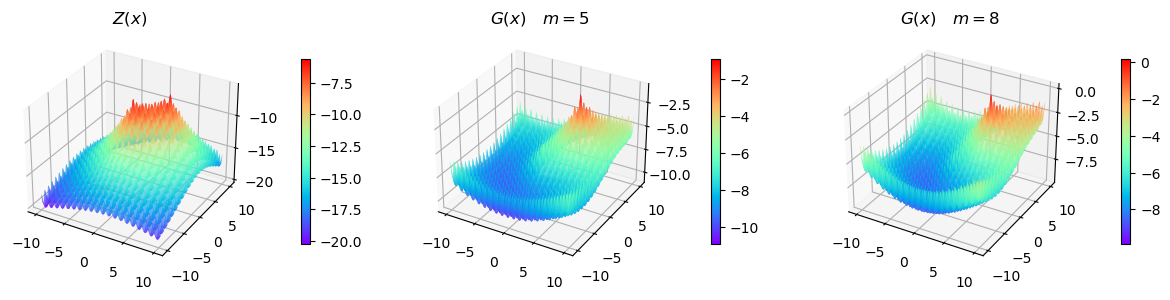

In [72]:
fig = plt.figure(figsize=[15,20])

ax_z = fig.add_subplot(1, 3, 1, projection='3d')
surf_z = ax_z.plot_surface(X,Y,Z.reshape(xx.shape[0], -1),rstride = 1, cstride = 1,cmap='rainbow')
fig.colorbar(surf_z, ax=ax_z, shrink = 0.12, aspect = 20, pad=0.15, orientation='vertical') 
ax_z.set_title("$Z(x)$")

ax_g5 = fig.add_subplot(1, 3, 2, projection='3d')
surf_g5 = ax_g5.plot_surface(X,Y,Gx5.reshape(xx.shape[0], -1),rstride = 1, cstride = 1,cmap='rainbow')
fig.colorbar(surf_g5, ax=ax_g5, shrink = 0.12, aspect = 20, pad=0.15, orientation='vertical') 
ax_g5.set_title("$G(x)\quad m=5$")

ax_g8 = fig.add_subplot(1, 3, 3, projection='3d')
surf_g8 = ax_g8.plot_surface(X,Y,Gx8.reshape(xx.shape[0], -1),rstride = 1, cstride = 1,cmap='rainbow')
fig.colorbar(surf_g8, ax=ax_g8, shrink = 0.12, aspect = 20, pad=0.15, orientation='vertical') 
ax_g8.set_title("$G(x)\quad m=8$")

# plt.savefig("D:\Jupyter_Projs//W//Hetero_GP//G_result_data/2D_z_g.pdf", dpi=1000, bbox_inches="tight")
# plt.show()
# axes = [ax_z, ax_g5, ax_g8]
# fig.colorbar(surf, ax=axes[:], shrink = 0.7, aspect = 7, orientation='horizontal') 

In [ ]:
# fig = plt.figure(figsize=[10, 8])  #定义新的三维坐标轴
# ax3 = plt.axes(projection='3d')

# #作图
# surf = ax3.plot_surface(X,Y,Z.reshape(xx.shape[0], -1),rstride = 1, cstride = 1,cmap='rainbow')
# fig.colorbar(surf, ax = ax3, shrink = 0.7, aspect = 7) 
# # ax3.contour(X,Y,Z.reshape(xx.shape[0], -1),offset=-1, cmap = 'rainbow')#绘制等高线
# ax3.set_title("$Z(x)$")
# plt.show()

In [ ]:
# fig = plt.figure(figsize=[10, 8])  #定义新的三维坐标轴
# axG = plt.axes(projection='3d')

# axG.plot_surface(X,Y,Gx5.reshape(xx.shape[0], -1),rstride = 1, cstride = 1,cmap='rainbow')
# axG.set_title("$G(x)\quad m=5$")
# plt.show()

In [ ]:
# fig = plt.figure(figsize=[10, 8])  #定义新的三维坐标轴
# axG = plt.axes(projection='3d')

# axG.plot_surface(X,Y,Gx8.reshape(xx.shape[0], -1),rstride = 1, cstride = 1,cmap='rainbow')
# axG.set_title("$G(x)\quad m=8$")
# plt.show()

# 1D Z, Gx5, Gx8

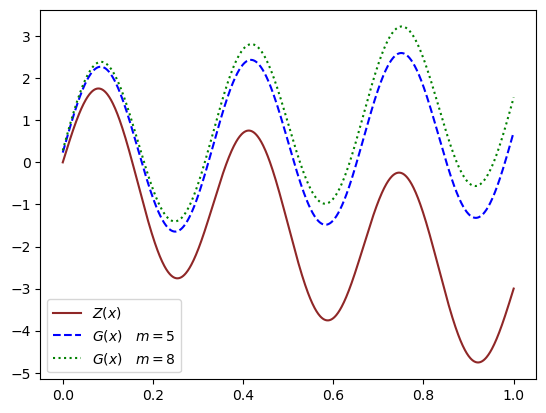

In [88]:
em3 = 0.846 
em5 = 1.163 
em8 = 1.42


xp = np.linspace(0,1, 1000)
zxp = 2 * np.sin(6 * np.pi * xp) - 3 * xp
s_xp = 0.2 + xp * 3
Gx5 = zxp + 1.163*s_xp
Gx8 = zxp + 1.42*s_xp

light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"
# plt.fill_between(xs, zxp-4*s_xp, zxp+1.540*s_xp, facecolor=light, color=light)
# plt.fill_between(xp, zxp-em8*s_xp, zxp+em8*s_xp, facecolor=light_highlight, color=light_highlight)
# plt.fill_between(xp, zxp-em5*s_xp, zxp+em5*s_xp,facecolor=mid, color=mid)
# plt.fill_between(xp, zxp-em3*s_xp, zxp+em3*s_xp, facecolor=mid_highlight, color=mid_highlight)
# plt.plot(xp, zxp, color=dark, marker='.', markersize=2, linestyle='dashed' )
plt.plot(xp, zxp, color=dark, linestyle='solid' )
plt.plot(xp, Gx5, color="b", linestyle='dashed')
plt.plot(xp, Gx8, color="g",linestyle= 'dotted')
# plt.scatter(xs, y_ob[0],s=4)
plt.legend(['$Z(x)$', '$G(x)\quad m=5$', '$G(x)\quad m=8$'], loc=3)
# filename =  "example__.pdf"
plt.savefig("D:\Jupyter_Projs//W//Hetero_GP//G_result_data/1D_z_g.pdf", dpi=500, bbox_inches="tight")

# example

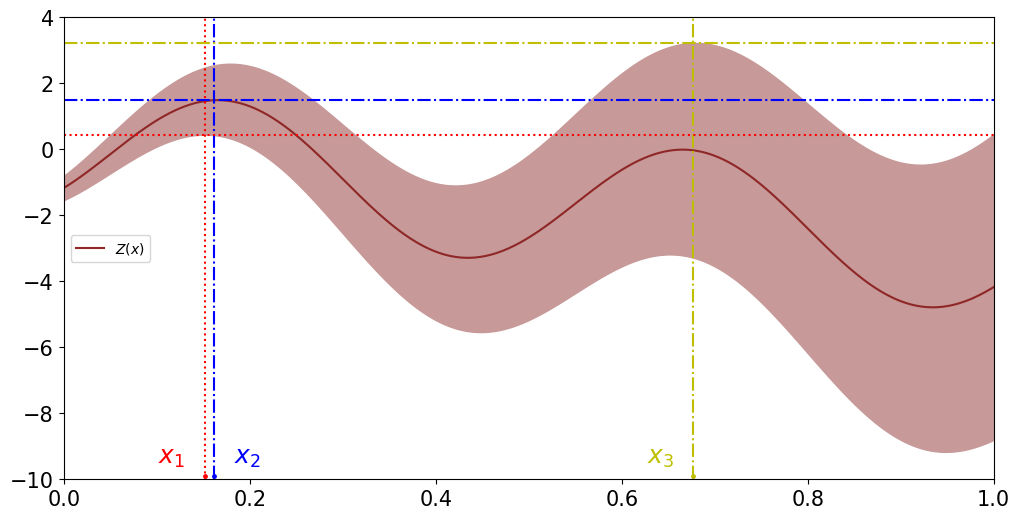

In [102]:
fig = plt.figure(figsize=[12,6])
em3 = 0.846 
em5 = 1.163 
em8 = 1.42
# em10 = 1.540

xp = np.linspace(0,1, 1000)

zxp = 2 * np.sin(4 * np.pi * (xp-0.05)) - 3 * xp 
s_xp = 0.5 + (xp-0.08) * 3 



light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"
#  0.846, 1.163, 1.42, 1.540
# plt.fill_between(xs, zxp-4*s_xp, zxp+1.540*s_xp, facecolor=light, color=light)


xxx = np.linspace(0, 1, 100)
z1000 = 2 * np.sin(4 * np.pi * (xxx-0.05)) - 3 * xxx
s1000 =  em8*(0.5 + (xxx-0.08) * 3 )

plt.plot(xp, zxp, color=dark)
plt.legend(['$Z(x)$'], loc=6)
x_1 = xxx[np.argmax(z1000-s1000)]
x_2= xxx[np.argmax(z1000)]
x_3 = xxx[np.argmax(z1000+s1000)]
y_1 = 2*np.sin(4*np.pi*(x_1-0.05)) - 3 * x_1 - (em8*(0.5 + (x_1-0.08) * 3 ))
y_2 = 2*np.sin(4*np.pi*(x_2-0.05))- 3 * x_2 
y_3 = 2*np.sin(4*np.pi*(x_3-0.05)) - 3 * x_3 + (em8*(0.5 + (x_3-0.08) * 3 ))
plt.vlines(x_1, -10, 4, linestyles='dotted', color='r')
plt.vlines(x_2, -10, 4, linestyles='dashdot', color='b')
plt.vlines(x_3, -10, 4, linestyles='dashdot', color='y')
plt.hlines(y_1, 0, 1, linestyles='dotted', color='r')
plt.hlines(y_2, 0, 1, linestyles='dashdot', color='b')
plt.hlines(y_3, 0, 1, linestyles='dashdot', color='y')

plt.xlim(0, 1)
plt.ylim(-10, 4)
# 'dashed', 'dashdot', 'dotted'

plt.fill_between(xp, zxp-em8*s_xp, zxp+em8*s_xp, facecolor=light_highlight, color=light_highlight)
plt.scatter(x_1, -9.9, color='r', s=6)
plt.scatter(x_2, -9.9, color='b', s=6)
plt.scatter(x_3, -9.9, color='y', s=6)
plt.text(x_1-0.05, -9.5, "$x_1$", size=18, color='r')
plt.text(x_2+0.022, -9.5, "$x_2$", size=18, color='b')
plt.text(x_3-0.05, -9.5, "$x_3$", size=18, color='y')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# plt.legend(['m=8', 'm=5', 'm=3'], loc=3)
# filename =  "example__.pdf"
# plt.savefig("D:\Jupyter_Projs//W//Hetero_GP//G_result_data/example.pdf", dpi=500, bbox_inches="tight")

NameError: name 'xxx' is not defined

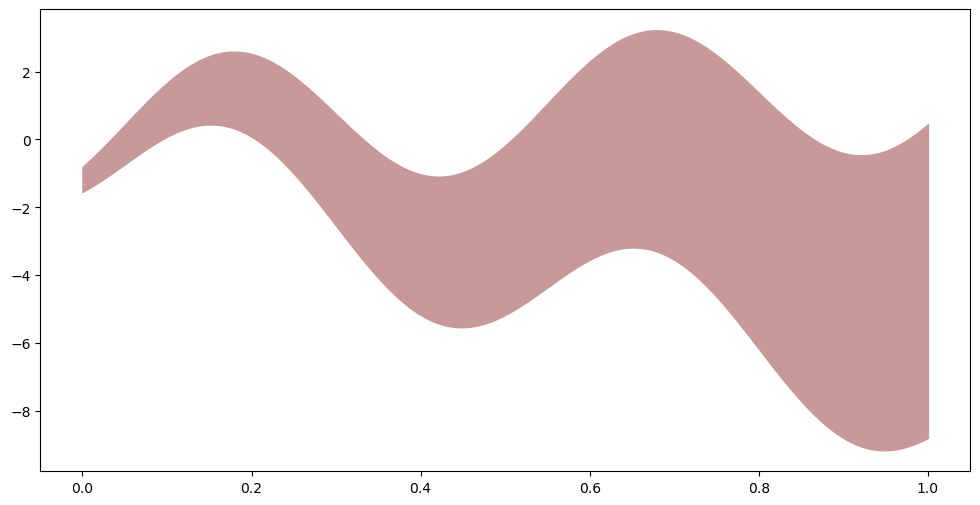

In [82]:
fig = plt.figure(figsize=[12,6])
em3 = 0.846 
em5 = 1.163 
em8 = 1.42
# em10 = 1.540

xp = np.linspace(0,1, 1000)

zxp = 2 * np.sin(4 * np.pi * (xp-0.05)) - 3 * xp 
s_xp = 0.5 + (xp-0.08) * 3 



light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"
#  0.846, 1.163, 1.42, 1.540
# plt.fill_between(xs, zxp-4*s_xp, zxp+1.540*s_xp, facecolor=light, color=light)
plt.fill_between(xp, zxp-em8*s_xp, zxp+em8*s_xp, facecolor=light_highlight, color=light_highlight)


x_1 = xxx[np.argmax(z1000-s1000)]
x_2= xxx[np.argmax(z1000)]
x_3 = xxx[np.argmax(z1000+s1000)]
y_1 = 2*np.sin(4*np.pi*(x_1-0.05)) - 3 * x_1 - (em8*(0.5 + (x_1-0.08) * 3 ))
y_2 = 2*np.sin(4*np.pi*(x_2-0.05))- 3 * x_2 
y_3 = 2*np.sin(4*np.pi*(x_3-0.05)) - 3 * x_3 + (em8*(0.5 + (x_3-0.08) * 3 ))
plt.vlines(x_1, -10, 4, linestyles='dotted', color='r')
plt.vlines(x_2, -10, 4, linestyles='dashdot', color='b')
plt.vlines(x_3, -10, 4, linestyles='dashdot', color='y')
plt.hlines(y_1, 0, 1, linestyles='dotted', color='r')
plt.hlines(y_2, 0, 1, linestyles='dashdot', color='b')
plt.hlines(y_3, 0, 1, linestyles='dashdot', color='y')

plt.xlim(0, 1)
plt.ylim(-10, 4)
# 'dashed', 'dashdot', 'dotted'
plt.plot(xp, zxp, color=dark)
plt.scatter(x_1, -9.9, color='r', s=6)
plt.scatter(x_2, -9.9, color='b', s=6)
plt.scatter(x_3, -9.9, color='y', s=6)
plt.text(x_1-0.05, -9.5, "$x_1$", size=18, color='r')
plt.text(x_2+0.022, -9.5, "$x_2$", size=18, color='b')
plt.text(x_3-0.05, -9.5, "$x_3$", size=18, color='y')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(['m=8', 'm=5', 'm=3'], loc=3)
# filename =  "example__.pdf"
# plt.savefig("D:\Jupyter_Projs//W//Hetero_GP//G_result_data/example.pdf", dpi=500, bbox_inches="tight")